# TUTORIAL ON INFERENCE IN DISCRETE BAYESIAN NETWORKS

by Sebastian T. Glavind, June 2020

# Inference with general bn.fit objects 

This notebook shows how make inferences using general bn.fit objects; these may be learned using the `bnlearn` package alone, or in combination with my toolboxes `sLearningAndDiscretizationTools` and `sLearningTools`, which are wrappers for the `bnlearn` package. For this tutorial we will use the inference functionalities of the `bnlearn` package, as well as the `gRain` package. The graph structure and discretization policy, and parameters that we will consider in this tutorial were found in the tutorials *Dynamic discretization and structure learning from fully observed data*, and *Parameter learning from fully observed data*, respectively.


## Prelude

In [21]:
library(bnlearn) # Package for learning bayesian networks (BNs)
library(gRain) # package for inference in BNs
source("../MyToolboxes/pLearningTools.R") # load toolbox from source location

## Data and input

In this tutorial, we use the publicly available [sachs](https://www.bnlearn.com/book-crc/) data set.

### Continuous data

In [22]:
DATA = read.table("../Discretize&sLearn/sachs.data.txt", header = T) # load continuous data set (data frame) from source location
nodes = names(DATA) # variable names

### Discrete data, discretization boundaries and BN model (from previous tutorial)

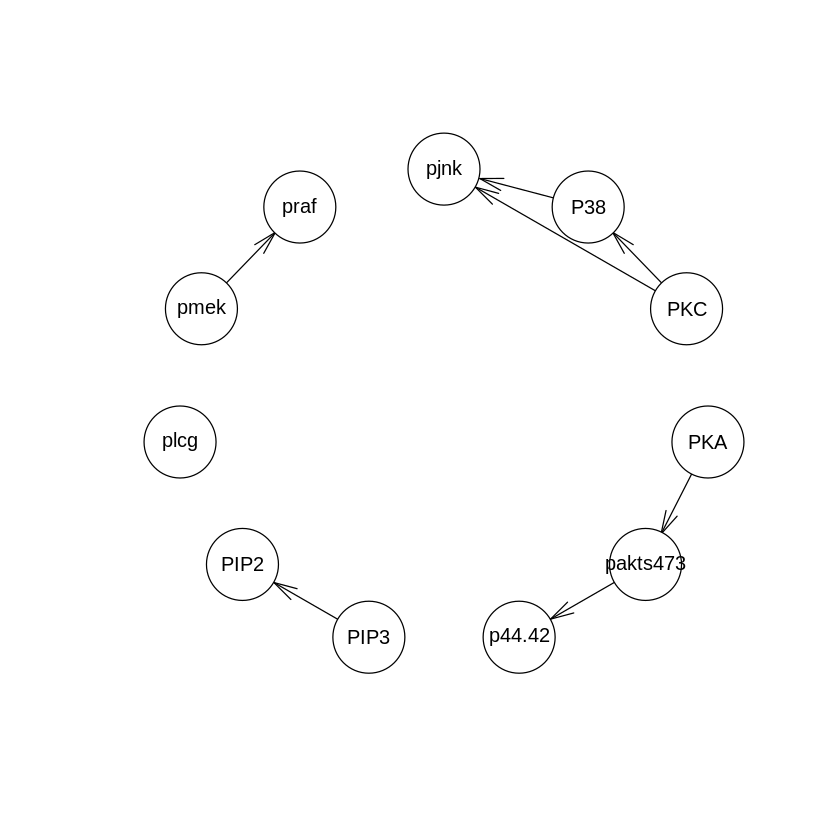

In [23]:
load("BNs_sLearn_fullyObs.rda")

plot(RES1$BN)

In [24]:
summary(RES1$dDATA, maxsum = 20)

          praf              pmek              plcg             PIP2    
 (-Inf,40.7]:290   (-Inf,16.1]:160   (-Inf,13.3]:285   (-Inf,48] :426  
 (40.7,64.4]:279   (16.1,24.2]:261   (13.3,20.9]:284   (48,146]  :300  
 (64.4, Inf]:284   (24.2,38]  :273   (20.9, Inf]:284   (146, Inf]:127  
                   (38,56]    :105                                     
                   (56, Inf]  : 54                                     
          PIP3             p44.42           pakts473                PKA     
 (-Inf,16.3]:288   (-Inf,10.4]:287   (-Inf,22.9]:287   (-Inf,154]     : 31  
 (16.3,32.8]:282   (10.4,14.1]:122   (22.9,35.5]:285   (154,394]      :318  
 (32.8, Inf]:283   (14.1,18.5]:127   (35.5, Inf]:281   (394,701]      :317  
                   (18.5,28.2]:188                     (701,1.49e+03] :152  
                   (28.2, Inf]:129                     (1.49e+03, Inf]: 35  
          PKC               P38               pjnk    
 (-Inf,9.06]:285   (-Inf,22]  :223   (-Inf,14.6]:28

### Object of the bn.fit class with MAP parameters and posterior counts (from previous tutorial)

In [25]:
load('BNs_pLearn_fullyObs.rda')

summary(BNmap)
summary(PC)

         Length Class        Mode
praf     4      bn.fit.dnode list
pmek     4      bn.fit.dnode list
plcg     4      bn.fit.dnode list
PIP2     4      bn.fit.dnode list
PIP3     4      bn.fit.dnode list
p44.42   4      bn.fit.dnode list
pakts473 4      bn.fit.dnode list
PKA      4      bn.fit.dnode list
PKC      4      bn.fit.dnode list
P38      4      bn.fit.dnode list
pjnk     4      bn.fit.dnode list

         Length Class Mode   
praf     15     table numeric
pmek      5     table numeric
plcg      3     table numeric
PIP2      9     table numeric
PIP3      3     table numeric
p44.42   15     table numeric
pakts473 15     table numeric
PKA       5     table numeric
PKC       3     table numeric
P38      12     table numeric
pjnk     36     table numeric

## Inference with bn.fit objects 


### Maximum a-posteriori (MAP) inference with `bnlearn` functionalities


Note that [`bnlearn`](https://www.bnlearn.com/) uses particle-based inference (logic sampling or likelihood weighting) to answer queries.

#### Inference for conditional probabilities

In [27]:
# P(pjnk = "(-Inf,14.6]")
set.seed(42)
N = 10000
inf1p1 = cpquery(BNmap, event = (pjnk == "(-Inf,14.6]"), evidence = TRUE, n = N)
inf1p1

[1] 0.3414

In [28]:
# P(pjnk = "(-Inf,14.6]" | evidence)
set.seed(42)
N = 10000
inf1p2 = cpquery(BNmap, event = (pjnk == "(-Inf,14.6]"), evidence = (PKC == "(-Inf,9.06]"), n = N)
inf1p2

[1] 0.2344034

#### Inference for conditional probability distribution

In [29]:
# P(pjnk, P38)
set.seed(42)
N = 10000
samp1d1 = cpdist(BNmap, nodes = c("pjnk", "P38"), evidence = TRUE, n = N)
head(samp1d1)
table(samp1d1)/N

pjnk,P38
"(33.7, Inf]","(47.6, Inf]"
"(14.6,33.7]","(47.6, Inf]"
"(-Inf,14.6]","(-Inf,22]"
"(-Inf,14.6]","(32.6,47.6]"
"(33.7, Inf]","(22,32.6]"
"(33.7, Inf]","(22,32.6]"


             P38
pjnk          (-Inf,22] (22,32.6] (32.6,47.6] (47.6, Inf]
  (-Inf,14.6]    0.0797    0.1405      0.0869      0.0343
  (14.6,33.7]    0.0338    0.0826      0.1469      0.0700
  (33.7, Inf]    0.1465    0.0822      0.0382      0.0584

In [30]:
# P(pjnk, P38 | evidence)
set.seed(42)
N = 10000
samp1d2 = cpdist(BNmap, nodes = c("pjnk", "P38"), evidence = (PKC == "(-Inf,9.06]"), n = N)
head(samp1d2)
table(samp1d2)/N

pjnk,P38
"(33.7, Inf]","(22,32.6]"
"(33.7, Inf]","(22,32.6]"
"(-Inf,14.6]","(-Inf,22]"
"(33.7, Inf]","(-Inf,22]"
"(33.7, Inf]","(-Inf,22]"
"(33.7, Inf]","(-Inf,22]"


             P38
pjnk          (-Inf,22] (22,32.6] (32.6,47.6] (47.6, Inf]
  (-Inf,14.6]    0.0380    0.0127      0.0057      0.0210
  (14.6,33.7]    0.0222    0.0074      0.0026      0.0000
  (33.7, Inf]    0.1400    0.0578      0.0200      0.0028

### MAP inference with `gRain` functionalities


Note that [`gRain`](http://people.math.aau.dk/~sorenh/software/gR/) performs exact inference using the junction tree algorithm.

In [31]:
junction = compile(as.grain(BNmap))
summary(junction)

Independence network: Compiled: TRUE Propagated: FALSE 
 Nodes : chr [1:11] "praf" "pmek" "plcg" "PIP2" "PIP3" "p44.42" "pakts473" "PKA" ...
 Number of cliques:                 6 
 Maximal clique size:               3 
 Maximal state space in cliques:   36 


#### Marginal distributions

In [32]:
# P(pjnk)
QGinf1m1 = querygrain(junction, nodes = c("pjnk"), type = "marginal")
QGinf1m1$pjnk

pjnk
(-Inf,14.6] (14.6,33.7] (33.7, Inf] 
  0.3341140   0.3341140   0.3317721

In [33]:
# P(pjnk | evidence)
junc_inf1m2 = setEvidence(junction, nodes = "PKC", states = "(-Inf,9.06]")
QGinf1m2 = querygrain(junc_inf1m2, nodes = c("pjnk"), type = "marginal")
QGinf1m2$pjnk

pjnk
(-Inf,14.6] (14.6,33.7] (33.7, Inf] 
  0.2246885   0.1020249   0.6732866

#### Joint distributions

In [34]:
# P(pjnk, P38)
QGinf1j1 = querygrain(junction, nodes = c("pjnk", "P38"), type = "joint")
QGinf1j1

,"(-Inf,14.6]","(14.6,33.7]","(33.7, Inf]"
"(-Inf,22]",0.07738095,0.03522639,0.14880952
"(22,32.6]",0.13592896,0.08557767,0.08206479
"(32.6,47.6]",0.08557767,0.14529664,0.04225215
"(47.6, Inf]",0.03522639,0.06801327,0.05864559


In [35]:
# compare with bnlearn result (approximate inference)
t(table(samp1d1)/N)

             pjnk
P38           (-Inf,14.6] (14.6,33.7] (33.7, Inf]
  (-Inf,22]        0.0797      0.0338      0.1465
  (22,32.6]        0.1405      0.0826      0.0822
  (32.6,47.6]      0.0869      0.1469      0.0382
  (47.6, Inf]      0.0343      0.0700      0.0584

In [36]:
# P(pjnk, P38 | evidence)
junc_inf1j2 = setEvidence(junction, nodes = "PKC", states = "(-Inf,9.06]")
QGinf1j2 = querygrain(junc_inf1j2, nodes = c("pjnk", "P38"), type = "joint")
QGinf1j2

,"(-Inf,14.6]","(14.6,33.7]","(33.7, Inf]"
"(-Inf,22]",0.10874221,7.019081e-02,0.427667445
"(22,32.6]",0.03163941,2.463006e-02,0.175330997
"(32.6,47.6]",0.01762072,7.106698e-03,0.063181464
"(47.6, Inf]",0.06668614,9.735202e-05,0.007106698


#### Conditional distributions 

In [37]:
# P(pjnk | P38)
QGinf1c1 = querygrain(junction, nodes = c("pjnk", "P38"), type = "conditional")
QGinf1c1

,"(-Inf,14.6]","(14.6,33.7]","(33.7, Inf]"
"(-Inf,22]",0.2960060,0.1347518,0.5692423
"(22,32.6]",0.4477660,0.2819029,0.2703311
"(32.6,47.6]",0.3133262,0.5319757,0.1546981
"(47.6, Inf]",0.2176010,0.4201326,0.3622664


In [38]:
# P(pjnk | P38, evidence)
QGinf1c2 = querygrain(junc_inf1j2, nodes = c("pjnk", "P38"), type = "conditional")
QGinf1c2

,"(-Inf,14.6]","(14.6,33.7]","(33.7, Inf]"
"(-Inf,22]",0.1792650,0.115711764,0.70502327
"(22,32.6]",0.1366120,0.106347205,0.75704077
"(32.6,47.6]",0.2004430,0.080841639,0.71871539
"(47.6, Inf]",0.9025033,0.001317523,0.09617918


### Posterior inference accounting for parameters uncertainties

Instead of using the MAP parameters to define the BN model, we may use the parameters distributions to draw realizations of the CTPs when needed, thus including parameters uncertainties in the model specification. This of cause has the implication that multiple realizations are needed in an inference setting. Using the `gRain` package and my toolbox `pLearningTools`, this may be implemented as follows...

- PC: Table object of posterior counts for parametrizing conditional probability tables (CPTs) - local Dirichlet distributions.

In [39]:
set.seed(42)

N = 100
Ppjnk1 = c()
for (n in 1:N){
    CPTsamp_i = myDirichletSampler(PC = PC) # //*pLearningTools*//
    BNsamp_i = custom.fit(RES1$BN, dist = CPTsamp_i)
    junc_i = compile(as.grain(BNsamp_i))
    # P(pjnk)
    QGinf_i = querygrain(junc_i, nodes = c("pjnk"), type = "marginal")
    # P(pjnk = "(-Inf,14.6]")
    Ppjnk1 = c(Ppjnk1, QGinf_i$pjnk[1])
}

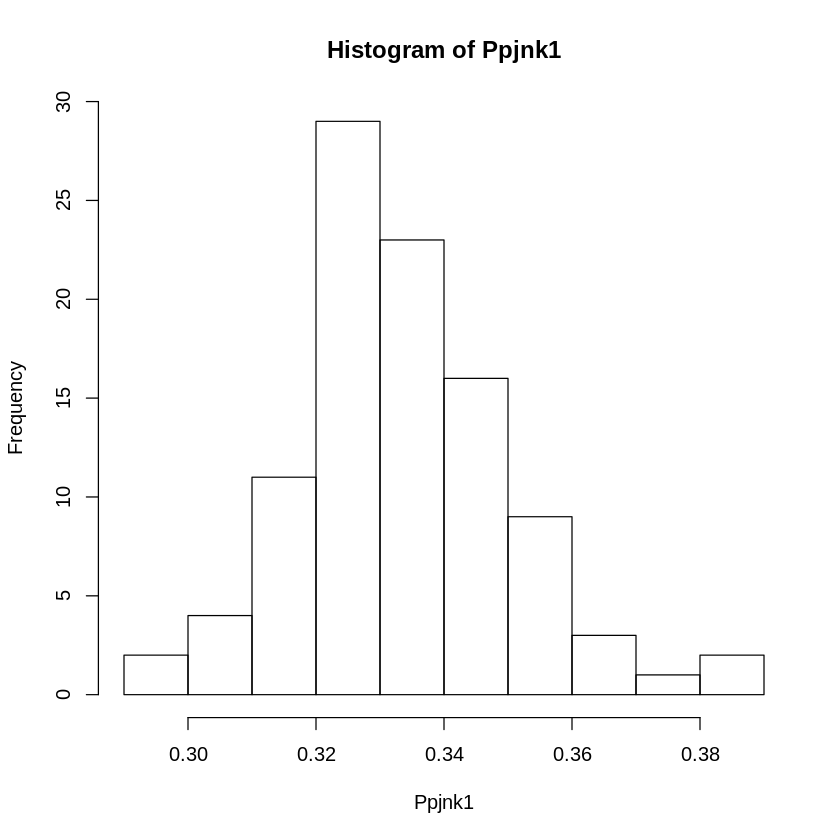

In [40]:
hist(Ppjnk1)